In [56]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


# Ex1: Onehot coding DNA

Write a function called **onehot_dna(dna_str)** that allows to encode a DNA segment where each base is encoded as a vector of all zeros except one in a specific position. The result of this function is an array numpy.  DNA is a long chain of repeating bases strung together. There are 4 bases: A, C, G, T. For example, "AACCCAAATCGGGGG" is a DNA segment.



For example, **onehot_dna('AAT')** should return

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])






In [57]:
import numpy as np

In [58]:
def onehot_dna(dna_str):
    base_to_onehot = {'A': [1, 0, 0, 0],
                      'C': [0, 1, 0, 0],
                      'G': [0, 0, 1, 0],
                      'T': [0, 0, 0, 1]}

    onehot_seq = []

    for base in dna_str:
        if base in base_to_onehot:
            onehot_seq.append(base_to_onehot[base])
        else:
            onehot_seq.append([0, 0, 0, 0])

    onehot_array = np.array(onehot_seq)

    return onehot_array

In [59]:
onehot_dna('AAT')

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

# Deep learning to classify Transcription Factor Biding


In the next exercises, we will learn how to use Deep learning to predict whether a segment of DNA does include or does not include a sit where JUND binds. (JUND is a particular transcription factor).

In this purpose, we will use data that is extracted from the chapter 6 of the book: 'Deep learning for the life science'. This book is written by B.Ramsundar, P.Eastman, P. Walters and V.Pande.


Data consist of DNA segments that have been split up from a full chromosome. Each segment is of 101 bases long and has been labeled to indicate whether it does or does not include a site where JUND binds to.


This is a binary classification problem.
The process of creating a PyTorch neural network binary classifier consists of several steps:

1. Prepare the training and test data

2. Implement a Dataset object to serve up the data

3. Design and implement a neural network

4. Write code to train the network

5. Write code to evaluate the model (the trained network)


# Ex 2:  Load Data

1. With the help of the joblib library, load the following files for training set:  **y_train.joblib**, **X_train.joblib**  and then store the results in variables **y_train, X_train** ,respectively.

2. Do the same thing for the test set: load  **y_test.joblib**, **X_test.joblib**  and then store the results in variables **y_test, X_test**, respectively.

3. What are the shape of **X_train** and **y_train** ? How many DNA segments are there in traning set ?

4. Display a DNA segment from **X_train** (using matplotlib.pyplot.imshow ).

5. Plot the histogram of **y_train** to see whether data is imbalanced or not.


In [60]:
## 1.
import joblib

X_train = joblib.load('data/X_train.joblib')
y_train = joblib.load('data/y_train.joblib')


In [61]:
## 2.
X_test = joblib.load('data/X_test.joblib')
y_test = joblib.load('data/y_test.joblib')

In [62]:
## 3.
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

num_segments_train = X_train.shape[0]
print("Number of DNA segments in the training set:", num_segments_train)

Shape of X_train: (4672, 101, 4)
Shape of y_train: (4672, 1)
Number of DNA segments in the training set: 4672


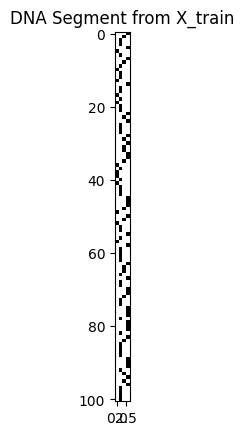

In [63]:
## 4.
import matplotlib.pyplot as plt

sample_segment = X_train[0]
plt.imshow(sample_segment, cmap='binary')
plt.title("DNA Segment from X_train")
plt.show()

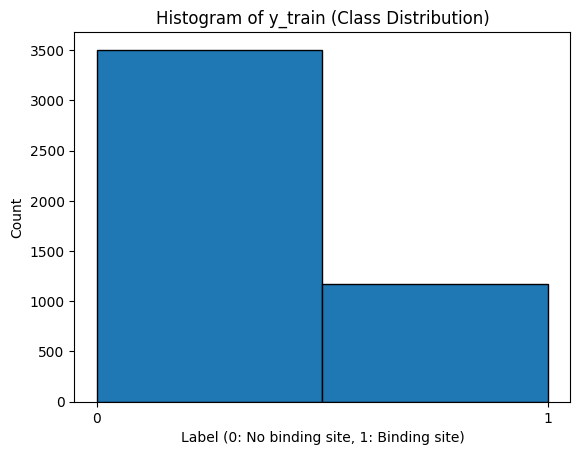

In [64]:
## 5.
plt.hist(y_train, bins=[0, 0.5, 1], edgecolor='black')
plt.xticks([0, 1])
plt.xlabel("Label (0: No binding site, 1: Binding site)")
plt.ylabel("Count")
plt.title("Histogram of y_train (Class Distribution)")
plt.show()

# Ex 3: Convert numpy array to tensor pytorch

As you see in the previous exercise, **X_train** consists of 4672 segments. Each segment is encoded by 0 and 1 (one-hot encoding).


1. Convert numpy array **X_train**, **y_train** into pytorch tensor. Reshape **X_train** to (4672, 4, 101). Note that the type of **X_train** and **y_train** should be float.

2. Do the same thing for **X_test** and **y_test**


In [65]:
## 1.
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 4, 101)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

In [66]:
print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)


Shape of X_train_tensor: torch.Size([4672, 4, 101])
Shape of y_train_tensor: torch.Size([4672, 1])


In [67]:
## 2.
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 4, 101)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [68]:
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

Shape of X_test_tensor: torch.Size([584, 4, 101])
Shape of y_test_tensor: torch.Size([584, 1])


# Ex4: Create Dataset
In order to train a deep learning model with Pytorch, we need a pytorch dataset.
The DNADataset class below allows for creating a pytorch Dataset from DNA segments and their labels.

1. Using this class, create a dataset for training set. You should call it **train_dataset**

2. Create **Dataloader** from **train_dataset**. You should call it **train_loader**.

3. Do the same thing for the test set.

In [69]:
class DNADataset(torch.utils.data.Dataset):
    def __init__(self, dna, labels):
        self.labels = labels
        self.dna = dna


    def __len__(self):
        return len(self.labels)


    def __getitem__(self, idx):
        label = self.labels[idx]
        frag_dna = self.dna[idx]

        sample = {'DNA': frag_dna, 'Class': label}

        return sample

In [70]:
## 1.
from torch.utils.data import Dataset, DataLoader

train_dataset = DNADataset(X_train_tensor, y_train_tensor)

In [71]:
## 2.
batch_size = 64 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [72]:
## 3.
test_dataset = DNADataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Design and implement a convolutional neural network

Now, it's time to build your model. This is a binary classification problem. We can use a convolution neural network, just like an image classification problem. However, since the size of a DNA segment is (4, 101), we will use 1D convolution instead of 2D convolution.



Firstly, we will test how does a 1D convolution work on our data.



# EX 5: 1D Convolution

1. With the help of the torch.nn.Conv1d class, create a 1D convolutional layer. You need to choose values for the following parameters: **in_channels**, **out_channels**, **kernel_size**.


2. Apply this layer to **dna_seg** below. What is the size of the output ?


3. [Optional] Display the output by using matplotlib.pyplot.imshow




In [73]:
## 1.
import torch
import torch.nn as nn

in_channels = 4  
out_channels = 8 
kernel_size = 3  

conv1d_layer = nn.Conv1d(in_channels, out_channels, kernel_size)

In [74]:
## 2.
dna_seg = torch.rand(4, 101)

output = conv1d_layer(dna_seg.unsqueeze(0))

print("Size of the output:", output.shape)

Size of the output: torch.Size([1, 8, 99])


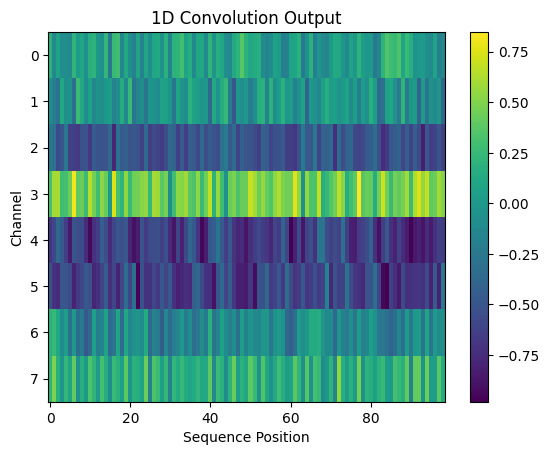

In [75]:
## 3.
import matplotlib.pyplot as plt

output = output.squeeze().detach().numpy()

plt.imshow(output, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("1D Convolution Output")
plt.xlabel("Sequence Position")
plt.ylabel("Channel")
plt.show()

# EX 6: Build a model

The following code is used to build a CNN model for a classification problem. This model consists of :

1. 3 layers of  1D-convolution. Each convolutional layer is followed by an activiation ReLu.

2. 2 Linear layers


Complete the lines # TODO below to finish the definition of this network.

In [76]:
import torch.nn as nn
import torch.nn.functional as F

class DeepDNA(nn.Module):

  def __init__(self, sequence_length):
    """
    Parameters
    -----------
    sequence_length: int
    num_class: int

    """
    super(DeepDNA,self).__init__()

    self.conv1 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3)
        
    self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3)
        
    self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)
        
    
    input_size = 32 * (sequence_length - 6)  # Assuming kernel_size=3 and padding=0 for all conv layers

    self.lin1 = nn.Linear(input_size, 32)
    self.lin2 = nn.Linear(32, 1)


  def forward(self, x):

    # 1/ pass the first convolutional layer
    #### TODO #####
    x = F.relu(self.conv1(x))

    # 2/ Pas the second convolutional layer
    #### TODO #####
    x = F.relu(self.conv2(x))
    # 3/ Pass the third convolution layer
    #### TODO #####
    x = F.relu(self.conv3(x))
    
    x = x.view(x.size(0), -1)

    # TODO
    # Linear Classifier
    x = F.relu(self.lin1(x))
    x = self.lin2(x)
    
    # Sigmoid
    x = nn.Sigmoid()(x)

    return x


# Ex 7 Test the model


1. Create an instance of the DeepDNA class named **net**.

2. Print out the variable **net** to see detailed information about the model.

3. Pass **dna_seg** below to **net** in order to  test if your model **net** works well.

4. What is the size of the output ?



In [77]:
## 1.
net = DeepDNA(sequence_length=101)

In [78]:
## 2.
print(net)

DeepDNA(
  (conv1): Conv1d(4, 8, kernel_size=(3,), stride=(1,))
  (conv2): Conv1d(8, 16, kernel_size=(3,), stride=(1,))
  (conv3): Conv1d(16, 32, kernel_size=(3,), stride=(1,))
  (lin1): Linear(in_features=3040, out_features=32, bias=True)
  (lin2): Linear(in_features=32, out_features=1, bias=True)
)


In [79]:
## 3.
dna_seg = torch.rand(4, 101).float()

In [80]:
## 4.
output = net(dna_seg.unsqueeze(0))
print("Size of the output:", output.shape)

Size of the output: torch.Size([1, 1])


# Ex 8: Define loss function and optimizer


1. Define an SGD optimizer for the model. You need to choose the learning rate for your model.

2. Define a Binary Cross Entropy (BCE) Loss  function.


In [81]:
## 1.
import torch.optim as optim

learning_rate = 0.001 
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

## 2.
criterion = nn.BCELoss()

# Ex 9: Training your model

The following function allows to train the model for one epoch. This function returns total loss per epoch.
Implement the training pass for this function.



The general process with PyTorch for one learning step consits of several steps:

1. Make a forward pass through the network
2. Use the network output to calculate the loss
3. Perform a backward pass through the network with loss.backward() to calculate the gradients
4. Take a step with the optimizer to update the weights



In [82]:
def train_one_epoch(model, dataloader, optimizer, criterion, device):
    model.train()  # Set the model to training mode

    total_loss = 0.0

    for batch in dataloader:
        inputs = batch['DNA'].to(device)
        labels = batch['Class'].to(device)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels.float())

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        total_loss += loss.item()

    return total_loss

In [83]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

# Define hyperparameters
num_epochs = 10  # Adjust the number of epochs as needed

# Training loop
for epoch in range(num_epochs):
    # Training for one epoch
    total_loss = train_one_epoch(net, train_loader, optimizer, criterion, device)
    
    # Print the loss for the current epoch
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}")

Epoch 1/10, Loss: 50.1067
Epoch 2/10, Loss: 49.0835
Epoch 3/10, Loss: 48.1225
Epoch 4/10, Loss: 47.2069
Epoch 5/10, Loss: 46.3416
Epoch 6/10, Loss: 45.5265
Epoch 7/10, Loss: 44.7676
Epoch 8/10, Loss: 44.0719
Epoch 9/10, Loss: 43.4500
Epoch 10/10, Loss: 42.9106


# Ex 11: Accuracy Calculation

Write a function named **compute_num_correct_pred(y_prob, y_label)** that allows to compute the number of correct predictions. **y_prob** and **y_label** should be pytorch tensors.

For example,
y_prob = [[0.3],[0.4], [0.8], [0.7]].

y = [[0], [1], [1], [0]].

This function should return 2.

In [84]:
### TODO ####
def compute_num_correct_pred(y_prob, y_label):
    # Convert predicted probabilities to binary predictions (0 or 1)
    y_pred = (y_prob >= 0.5).float()

    # Compare the binary predictions with the ground truth labels
    correct_pred = (y_pred == y_label.float()).sum().item()

    return correct_pred

# Example usage:
y_prob = torch.tensor([[0.3], [0.4], [0.8], [0.7]])
y_label = torch.tensor([[0], [1], [1], [0]])

num_correct = compute_num_correct_pred(y_prob, y_label)
print("Number of correct predictions:", num_correct)


Number of correct predictions: 2



The function below allows to calculate the accuracy of the model on dataset loader. Execute this function to see if you implemented the compute_num_correct_pred function correctly.

In [85]:
def test(loader):
  net.eval()

  correct = 0
  with torch.no_grad():
    for data in loader:
      dna = data['DNA']
      y = data['Class']

      out = net(dna)
      correct += compute_num_correct_pred(out, y)

  return correct / len(loader.dataset)

In [86]:
accuracy = test(test_loader)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

Accuracy on the test set: 75.00%


# Ex 12: Training the model

Write code to train your model on 10 epoches to see if everything is going well and then you can try to add more epoches.


In [87]:
batch_size = 64
learning_rate = 0.001
num_epochs = 10  # You can increase this number for more epochs

# Create instances of your dataset class for training and test sets
train_dataset = DNADataset(X_train_tensor, y_train_tensor)
test_dataset = DNADataset(X_test_tensor, y_test_tensor)

# Create data loaders for training and test sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# Initialize your model
model = DeepDNA(sequence_length=101)  # Adjust with the actual sequence length

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define a function to compute the number of correct predictions
def compute_num_correct_pred(y_prob, y_label):
    y_pred = (y_prob >= 0.5).float()
    correct_pred = (y_pred == y_label.float()).sum().item()
    return correct_pred

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    total_loss = 0.0
    correct_predictions = 0

    for batch in train_loader:
        inputs = batch['DNA']
        labels = batch['Class']

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct_predictions += compute_num_correct_pred(outputs, labels)

    train_accuracy = correct_predictions / len(train_dataset)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {total_loss:.4f}, Train Accuracy: {train_accuracy * 100:.2f}%")

# After training, you can evaluate the model on the test set
model.eval()  # Set the model to evaluation mode
test_correct_predictions = 0

with torch.no_grad():
    for batch in test_loader:
        inputs = batch['DNA']
        labels = batch['Class']

        outputs = model(inputs)
        test_correct_predictions += compute_num_correct_pred(outputs, labels)

test_accuracy = test_correct_predictions / len(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10, Loss: 49.9972, Train Accuracy: 74.49%
Epoch 2/10, Loss: 49.0360, Train Accuracy: 75.00%
Epoch 3/10, Loss: 48.1160, Train Accuracy: 75.00%
Epoch 4/10, Loss: 47.2193, Train Accuracy: 75.00%
Epoch 5/10, Loss: 46.3608, Train Accuracy: 75.00%
Epoch 6/10, Loss: 45.5363, Train Accuracy: 75.00%
Epoch 7/10, Loss: 44.7520, Train Accuracy: 75.00%
Epoch 8/10, Loss: 44.0072, Train Accuracy: 75.00%
Epoch 9/10, Loss: 43.3217, Train Accuracy: 75.00%
Epoch 10/10, Loss: 42.7362, Train Accuracy: 75.00%
Test Accuracy: 75.00%


# Ex13 (optional)

1. If we use torch.nn.BCEWithLogitsLoss(), what does we need to change to the definition of the model ?


2. The same question for torch.nn.CrossEntropyLoss() loss.  

In [88]:
import torch.nn as nn
import torch.nn.functional as F

#Pour le BCE
class DeepDNA(nn.Module):

    def __init__(self, sequence_length):
        super(DeepDNA, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)

        self.lin1 = nn.Linear(32, 1) 

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        x = F.avg_pool1d(x, x.size(2))
        x = x.view(x.size(0), -1)

        
        x = self.lin1(x)

        return x

In [89]:
import torch.nn as nn
import torch.nn.functional as F

#Pour le CrossEntropyLoss
class DeepDNA(nn.Module):

    def __init__(self, sequence_length, num_classes):
        super(DeepDNA, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=4, out_channels=8, kernel_size=3)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3)

        # Fully connected layers
        self.lin1 = nn.Linear(32, num_classes)  # Adjust the input size based on conv_output_size

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))

        x = F.avg_pool1d(x, x.size(2))
        x = x.view(x.size(0), -1)

        # The last layer does not have an activation function
        x = self.lin1(x)

        return x